<a href="https://colab.research.google.com/github/wahyumulyautama/Macro-Micro-Expression-Classification-with-CNN-CASME-2-/blob/master/MacroandMicroExpCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import cv2
import numpy
import numpy as np
import imageio
import pickle
import matplotlib.pyplot as plt
import dlib
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Dropout, Activation, Dense, Flatten, Conv3D, MaxPooling3D
from tensorflow.keras.layers import InputLayer
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils, generic_utils
from sklearn.model_selection import train_test_split
from keras import backend as K
import sys
from keras import backend
backend.set_image_data_format('channels_first')


**LINK TO GOOGLE DRIVE**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**FRAME SIZE AND DEPTH**

In [6]:
image_rows, image_columns, image_depth = 64,64,96

**TRAINING LIST**

In [7]:
training_list = []

In [8]:
angrypath = '/content/drive/MyDrive/TA/Dataset/video/angry/'
happypath = '/content/drive/MyDrive/TA/Dataset/video/happy/'
disgustpath = '/content/drive/MyDrive/TA/Dataset/video/disgust/'

**SHAPE PREDICTOR MODEL**

In [9]:
predictor_model = '/content/drive/MyDrive/TA/Landmark/shape_predictor_68_face_landmarks.dat'
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

**DIRECTORY LISTING DATASET** 



In [10]:
directorylisting = os.listdir(angrypath)
for video in directorylisting:
  frames = []
  videopath = angrypath + video
  print ('Done ->' + video)
  loadedvideo = imageio.get_reader(videopath, 'ffmpeg')
  framerange = [x +72 for x in range (96)]
  for frame in framerange: 
    images = loadedvideo.get_data(frame)
    detected_faces = face_detector(images) #Jalankan HOG face detector pada data frame
    for face_rect in detected_faces : #Pergunakan frame pertama sebagai frame referensi
      face_top = face_rect.top()
      face_bottom = face_rect.bottom()
      face_left = face_rect.left()
      face_right = face_rect.right()
      face = images[face_top:face_bottom, face_left:face_right] #Potong daerah wajah
    imageresize = cv2.resize(face, (image_rows,image_columns), interpolation = cv2.INTER_AREA)
    grayimage = cv2.cvtColor(imageresize, cv2.COLOR_BGR2GRAY)
    frames.append(grayimage)
  frames = numpy.asarray(frames)
  videoarray = numpy.rollaxis(numpy.rollaxis(frames, 2, 0), 2, 0)
  training_list.append(videoarray)
  print('All Done')


Done ->15_0402beatingpregnantwoman.avi
All Done
Done ->15_0401girlcrashing.avi
All Done
Done ->16_0402beatingpregnantwoman.avi
All Done
Done ->16_0401girlcrashing.avi
All Done
Done ->19_0402beatingpregnantwoman.avi
All Done
Done ->21_0401girlcrashing.avi
All Done
Done ->22_0402beatingpregnantwoman.avi
All Done
Done ->23_0402beatingpregnantwoman.avi
All Done
Done ->24_0401girlcrashing.avi
All Done
Done ->24_0402beatingpregnantwoman.avi
All Done
Done ->26_0401girlcrashing.avi
All Done
Done ->27_0401girlcrashing.avi
All Done
Done ->27_0402beatingpregnantwoman.avi
All Done
Done ->30_0401girlcrashing.avi
All Done
Done ->31_0402beatingpregnantwoman.avi
All Done
Done ->31_0401girlcrashing.avi
All Done
Done ->32_0401girlcrashing.avi
All Done
Done ->32_0402beatingpregnantwoman.avi
All Done
Done ->33_0402beatingpregnantwoman.avi
All Done
Done ->34_0402beatingpregnantwoman.avi
All Done
Done ->34_0401girlcrashing.avi
All Done
Done ->36_0401girlcrashing.avi
All Done
Done ->37_0402beatingpregnantwom

In [11]:
directorylisting = os.listdir(happypath)
for video in directorylisting:
  frames = []
  videopath = happypath + video
  print ('Done ->' + video)
  loadedvideo = imageio.get_reader(videopath, 'ffmpeg')
  framerange = [x + 72 for x in range(96)]
  for frame in framerange: 
    images = loadedvideo.get_data(frame)
    detected_faces = face_detector(images) #Jalankan HOG face detector pada data frame
    for face_rect in detected_faces : #Pergunakan frame pertama sebagai frame referensi
      face_top = face_rect.top()
      face_bottom = face_rect.bottom()
      face_left = face_rect.left()
      face_right = face_rect.right()
      face = images[face_top:face_bottom, face_left:face_right] #Potong daerah wajah
    imageresize = cv2.resize(face, (image_rows,image_columns), interpolation = cv2.INTER_AREA)
    grayimage = cv2.cvtColor(imageresize, cv2.COLOR_BGR2GRAY)
    frames.append(grayimage)
  frames = numpy.asarray(frames)
  videoarray = numpy.rollaxis(numpy.rollaxis(frames, 2, 0), 2, 0)
  training_list.append(videoarray)
  print('All Done')


Done ->15_0503unnyfarting.avi
All Done
Done ->15_0505funnyinnovations.avi
All Done
Done ->15_0502funnyerrors.avi
All Done
Done ->16_0507climbingthewall.avi
All Done
Done ->16_0505funnyinnovations.avi
All Done
Done ->16_0502funnyerrors.avi
All Done
Done ->19_0505funnyinnovations.avi
All Done
Done ->19_0507climbingthewall.avi
All Done
Done ->20_0502funnyerrors.avi
All Done
Done ->22_0508funnydunkey.avi
All Done
Done ->22_0503unnyfarting.avi
All Done
Done ->23_0503unnyfarting.avi
All Done
Done ->23_0502funnyerrors.avi
All Done
Done ->23_0507climbingthewall.avi
All Done
Done ->24_0507climbingthewall.avi
All Done
Done ->24_0502funnyerrors.avi
All Done
Done ->25_0508funnydunkey.avi
All Done
Done ->25_0502funnyerrors.avi
All Done
Done ->26_0503unnyfarting.avi
All Done
Done ->27_0503unnyfarting.avi
All Done
Done ->27_0502funnyerrors.avi
All Done
Done ->27_0505funnyinnovations.avi
All Done
Done ->27_0507climbingthewall.avi
All Done
Done ->27_0508funnydunkey.avi
All Done
Done ->29_0502funnyerror

In [12]:
directorylisting = os.listdir(disgustpath)
for video in directorylisting:
  frames = []
  videopath = disgustpath + video
  print ('Done ->' + video)
  loadedvideo = imageio.get_reader(videopath, 'ffmpeg')
  framerange = [x +72 for x in range (96)]
  for frame in framerange: 
    images = loadedvideo.get_data(frame)
    detected_faces = face_detector(images) #Jalankan HOG face detector pada data frame
    for face_rect in detected_faces : #Pergunakan frame pertama sebagai frame referensi
      face_top = face_rect.top()
      face_bottom = face_rect.bottom()
      face_left = face_rect.left()
      face_right = face_rect.right()
      face = images[face_top:face_bottom, face_left:face_right] #Potong daerah wajah
    imageresize = cv2.resize(face, (image_rows,image_columns), interpolation = cv2.INTER_AREA)
    grayimage = cv2.cvtColor(imageresize, cv2.COLOR_BGR2GRAY)
    frames.append(grayimage)
  frames = numpy.asarray(frames)
  videoarray = numpy.rollaxis(numpy.rollaxis(frames, 2, 0), 2, 0)
  training_list.append(videoarray)
  print('All Done')


Done ->15_0101disgustingteeth.avi
All Done
Done ->15_0102eatingworms.avi
All Done
Done ->16_0102eatingworms.avi
All Done
Done ->16_0101disgustingteeth.avi
All Done
Done ->19_0102eatingworms.avi
All Done
Done ->21_0101disgustingteeth.avi
All Done
Done ->22_0102eatingworms.avi
All Done
Done ->22_0101disgustingteeth.avi
All Done
Done ->23_0102eatingworms.avi
All Done
Done ->24_0101disgustingteeth.avi
All Done
Done ->25_0102eatingworms.avi
All Done
Done ->25_0101disgustingteeth.avi
All Done
Done ->26_0101disgustingteeth.avi
All Done
Done ->26_0102eatingworms.avi
All Done
Done ->27_0102eatingworms.avi
All Done
Done ->27_0101disgustingteeth.avi
All Done
Done ->30_0102eatingworms.avi
All Done
Done ->30_0101disgustingteeth.avi
All Done
Done ->31_0101disgustingteeth.avi
All Done
Done ->32_0101disgustingteeth.avi
All Done
Done ->32_0102eatingworms.avi
All Done
Done ->33_0102eatingworms.avi
All Done
Done ->35_0102eatingworms.avi
All Done
Done ->37_0101disgustingteeth.avi
All Done


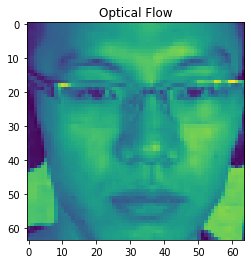

In [13]:
plt.imshow(grayimage)
plt.title("Optical Flow")
plt.show()

**MENYIMPAN HASIL PEMROSESAN KE DALAM PKL FILE**

In [14]:
#Membuat direktori baru untuk 'pkl_File'
dir_crop = '/content/drive/MyDrive/TA/pkl File Proc3/'
if os.path.exists(dir_crop)==False:
  os.mkdir(dir_crop)

In [15]:
pickle.dump(training_list, open('/content/drive/MyDrive/TA/pkl File Proc3/' + 'training_list.pkl', 'wb') )

**MEMUAT DATASET HASIL PEMROSESAN .pkl**

In [16]:
training_list = pickle.load(open('/content/drive/MyDrive/TA/pkl File Proc3/' + 'training_list.pkl', 'rb') )

**TRAINING LIST, SAMPLE AND LABELS**

In [17]:
training_list = numpy.asarray(training_list)
training_samples = len(training_list)
training_labels = numpy.zeros((training_samples, ), dtype = int)

In [18]:
training_labels[0:24] = 0
training_labels[24:73] = 1
training_labels[73:97] = 2

In [19]:
training_labels = np_utils.to_categorical(training_labels, 3)

In [20]:
training_data = [training_list, training_labels]
(training_frames, training_labels) = (training_data[0], training_data[1])
training_set = numpy.zeros((training_samples, 1, image_rows, image_columns, image_depth))
for h in range(training_samples):
  training_set[h][0][:][:][:] = training_frames[h,:,:,:]

In [21]:
training_set = training_set.astype('float32')
training_set -= numpy.mean(training_set)
training_set /= numpy.max(training_set) 

**SAVE TRAINING IMAGES AND LABELS IN A NUMPY ARRAY**

In [22]:
numpy.save('/content/drive/MyDrive/TA/microexpcnn_images.npy', training_set)
numpy.save('/content/drive/MyDrive/TA/microexpcnn_labels.npy', training_labels)

**LOAD TRAINING IMAGES AND LABELS THAT ARE STORED IN A NUMPY ARRAY**

In [23]:
training_set = numpy.load('/content/drive/MyDrive/TA/microexpcnn_images.npy')
training_labels = numpy.load('/content/drive/MyDrive/TA/microexpcnn_labels.npy')

**MICROEXPCNN MODEL**

In [27]:
model = Sequential()
model.add(Conv3D(32, (3, 3, 15), input_shape=(1, image_rows, image_columns, image_depth), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(3, 3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(Dense(3, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.0002), metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1 (Conv3D)           (None, 32, 62, 62, 82)    4352      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 62, 62, 82)   328       
 hNormalization)                                                 
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 32, 20, 20, 27)   0         
 3D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 20, 20, 27)    0         
                                                                 
 flatten_1 (Flatten)         (None, 345600)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

LOAD PRE-TRAINED WEIGHTS

In [ ]:
""""
model.load_weights('/content/drive/MyDrive/TA/MicroExpCNN/Weights/weights-improvement-53-0.88.hdf5')

**WEIGHTS FILE PATH**

In [29]:
filepath="/content/drive/MyDrive/TA/microexpcnn_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

**SPLITTING THE DATASET INTO TRAINING AND VALIDATION SETS**

In [30]:
train_set, validation_set, train_labels, validation_labels = train_test_split(training_set, training_labels, test_size=0.2, random_state=4, shuffle=True)

**SAVE VALIDATION SET IN A NUMPY ARRAY**

In [ ]:
""""
numpy.save('/content/drive/MyDrive/TA/microexpcnn_val_images.npy', validation_images)
numpy.save('/content/drive/MyDrive/TAmicroexpcnn_val_labels.npy', validation_labels)

**LOAD VALIDATION SET FROM NUMPY ARRAY**

In [ ]:
""""
validation_images = numpy.load('/content/drive/MyDrive/TA/MicroExpCNN/Data Validation/microexpcnn_val_images.npy', validation_images)
validation_images = numpy.load('/content/drive/MyDrive/TA/MicroExpCNN/Data Validation/microexpcnn_val_labels.npy', validation_labels)

**TRAINING THE MODEL**

In [31]:
history = model.fit(train_set, train_labels, validation_data = (validation_set, validation_labels), callbacks=callbacks_list, batch_size = 5, epochs = 50, )

Epoch 1/50
16/16 [==============================] - 15s 126ms/step - loss: 1.7115 - accuracy: 0.3816 - val_loss: 1.6530 - val_accuracy: 0.2500
Epoch 2/50
16/16 [==============================] - 1s 91ms/step - loss: 1.6002 - accuracy: 0.4474 - val_loss: 1.6577 - val_accuracy: 0.3000
Epoch 3/50
16/16 [==============================] - 1s 93ms/step - loss: 1.4948 - accuracy: 0.5263 - val_loss: 1.6735 - val_accuracy: 0.3000
Epoch 4/50
16/16 [==============================] - 1s 90ms/step - loss: 1.4407 - accuracy: 0.5921 - val_loss: 1.6865 - val_accuracy: 0.3000
Epoch 5/50
16/16 [==============================] - 1s 85ms/step - loss: 1.3660 - accuracy: 0.7500 - val_loss: 1.6913 - val_accuracy: 0.3000
Epoch 6/50
16/16 [==============================] - 1s 86ms/step - loss: 1.3131 - accuracy: 0.7237 - val_loss: 1.7283 - val_accuracy: 0.3000
Epoch 7/50
16/16 [==============================] - 1s 86ms/step - loss: 1.3518 - accuracy: 0.6842 - val_loss: 1.7421 - val_accuracy: 0.3000
Epoch 8/50


**AVERAGE OF ACCURACY**

In [32]:
print('Average of Accuracy :', "%.2f" % np.mean(history.history['accuracy']))

Average of Accuracy : 0.85


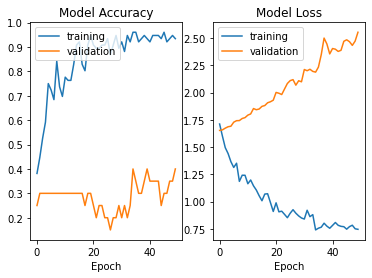

In [33]:
plt.ion()
fig = plt.figure()
subfig = fig.add_subplot(1,2,1)
subfig.plot(history.history['accuracy'], label="training")
if history.history['val_accuracy'] is not None:
    subfig.plot(history.history['val_accuracy'], label="validation")
subfig.set_title('Model Accuracy')
subfig.set_xlabel('Epoch')
subfig.legend(loc='upper left')
subfig = fig.add_subplot(1,2,2)
subfig.plot(history.history['loss'], label="training")
if history.history['val_loss'] is not None:
    subfig.plot(history.history['val_loss'], label="validation")
subfig.set_title('Model Loss')
subfig.set_xlabel('Epoch')
subfig.legend(loc='upper left')
plt.ioff()

#masih overfitting

**FINDING CONFUSION MATRIX USING PRETAINED WEIGHTS**

Confusion matrix, without normalization
[[2 2 2]
 [4 6 1]
 [2 1 0]]


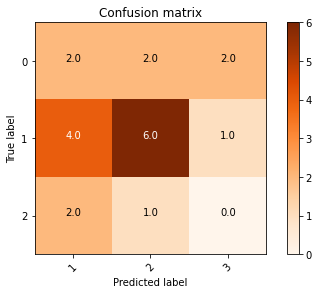

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(cm.shape[1])
  plt.xticks(tick_marks, rotation=45)
  ax = plt.gca()
  ax.set_xticklabels((ax.get_xticks() +1).astype(str))
  plt.yticks(tick_marks)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.1f'),
             horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

predictions = model.predict(validation_set)
predictions_labels = numpy.argmax(predictions, axis=1)
validation_labels = numpy.argmax(validation_labels, axis=1)
cfm = confusion_matrix(validation_labels, predictions_labels)

np.set_printoptions(precision=1)
print('Confusion matrix, without normalization')
print(cfm)
fig, ax = plt.subplots()
plot_confusion_matrix(cfm)

plt.show()

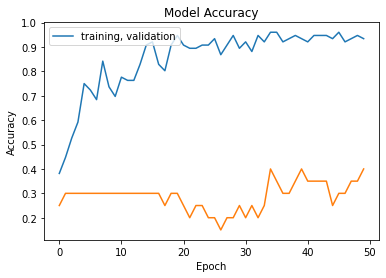

In [35]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training, validation'], loc='upper left')
plt.show()

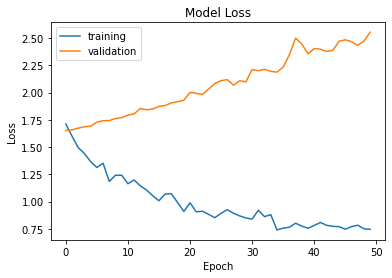

In [36]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()